In [1]:
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D

#Warningds
import warnings
warnings.filterwarnings('ignore') 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data_path = '/roboflow-brain-mri-combined/roboflow total brain mri/train'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [3]:
test_data_path = '/roboflow-brain-mri-combined/roboflow total brain mri/test'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [4]:
img_size = (224 ,224)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

# valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
#                                        class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 19432 validated image filenames belonging to 4 classes.
Found 4859 validated image filenames belonging to 4 classes.


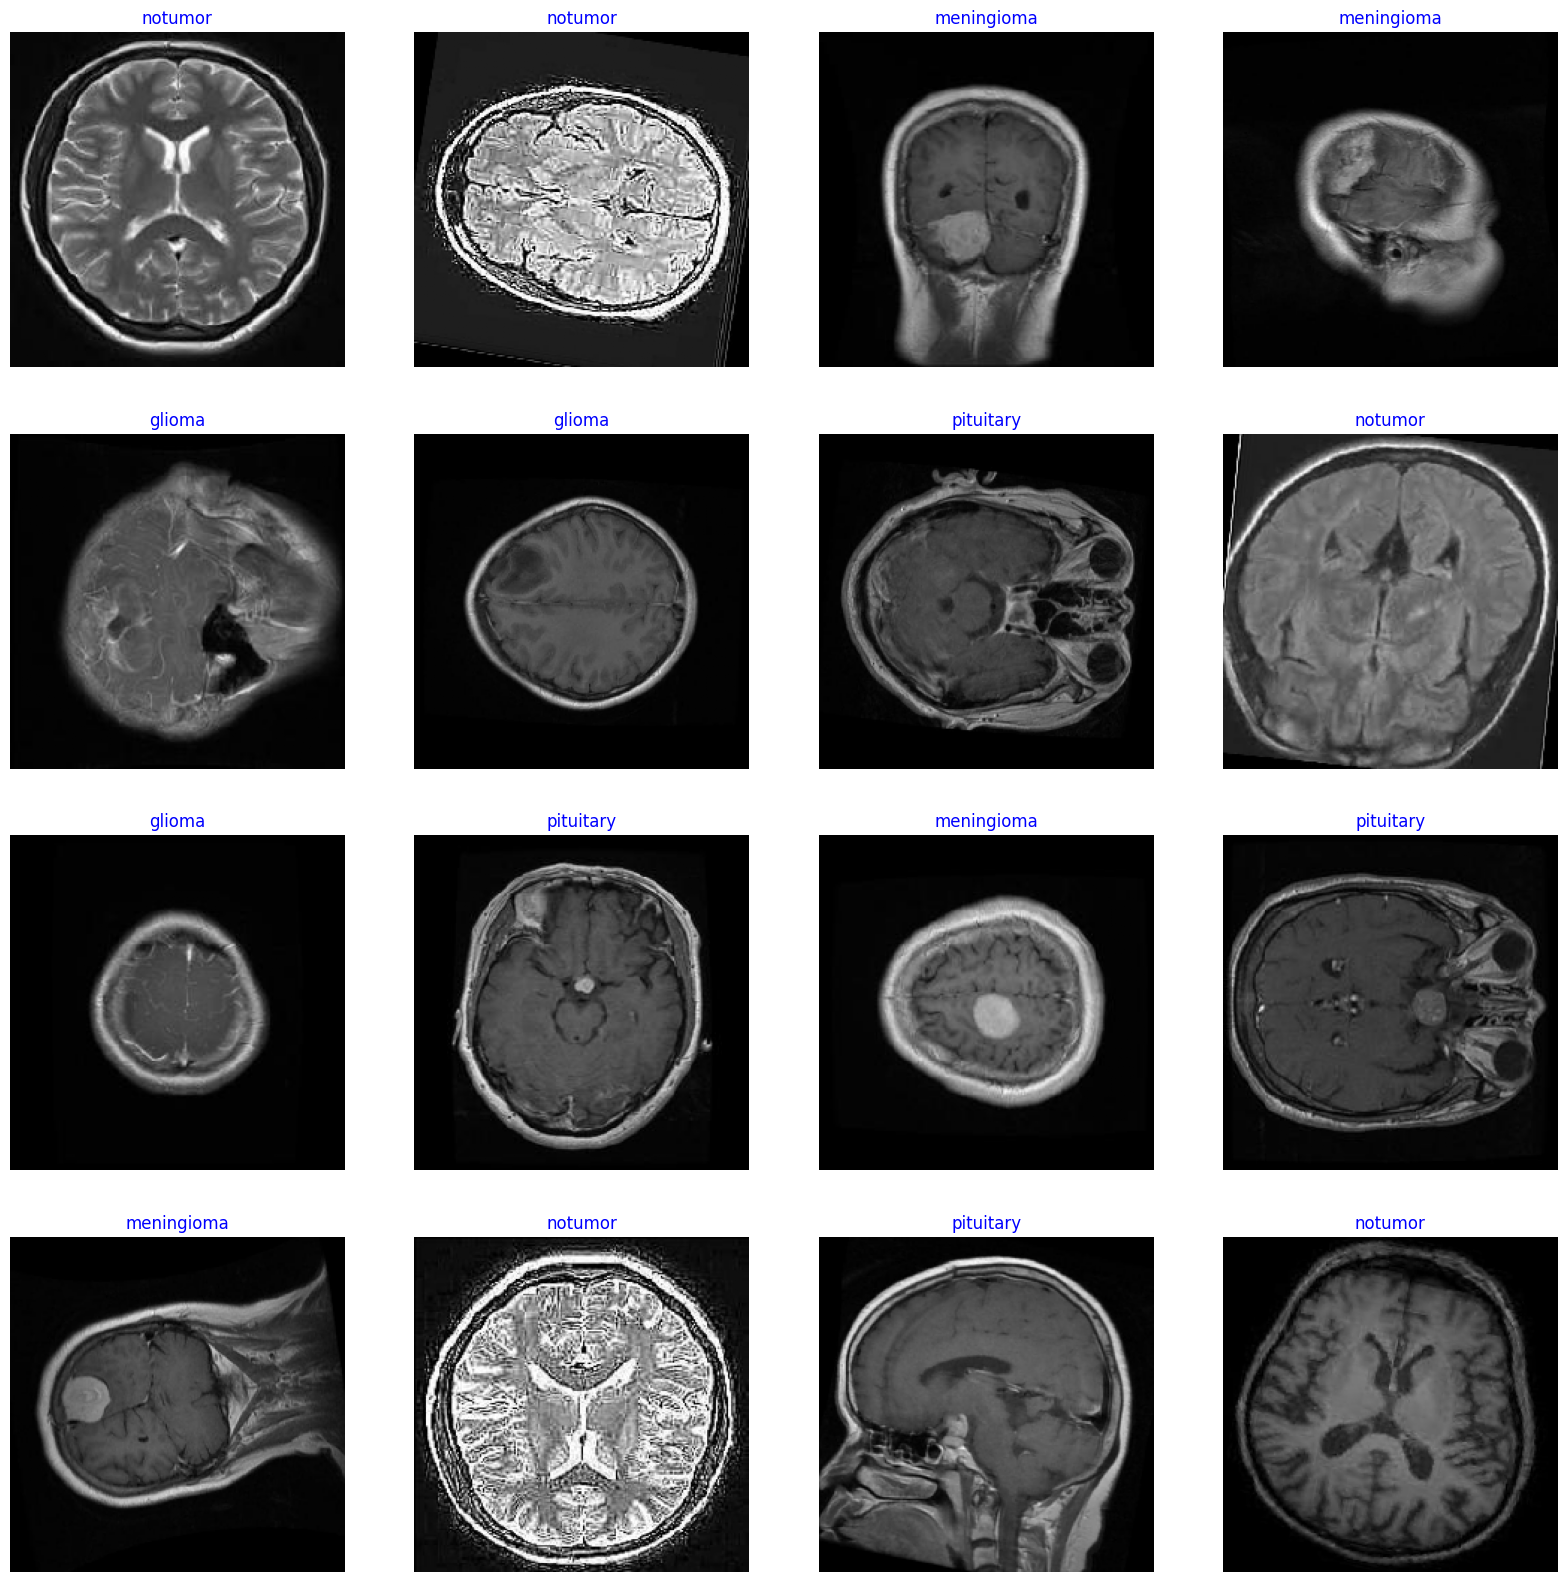

In [5]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [6]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [7]:
# Specify the path to save the best model weights
checkpoint_filepath = '/cnn_best_weights.h5'
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
# Set up the ModelCheckpoint callback to save weights with the highest validation accuracy
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# ****Optimizers

**Adam**

In [ ]:

from tensorflow.keras.optimizers import Adagrad, Adadelta, Nadam
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

**RMSprop**

In [ ]:

from tensorflow.keras.optimizers import Adagrad, Adadelta, Nadam
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

**Adamax**

In [ ]:
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

**SGD**

In [ ]:

from tensorflow.keras.optimizers import Adagrad, Nadam
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [33]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1019
           1       0.78      0.75      0.77      1178
           2       0.88      0.89      0.89      1266
           3       0.97      0.88      0.92      1396

    accuracy                           0.87      4859
   macro avg       0.87      0.87      0.87      4859
weighted avg       0.87      0.87      0.87      4859



**Adadelta**

In [ ]:
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=Adadelta(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

**Adagrad**

In [ ]:

from tensorflow.keras.optimizers import Adagrad, Nadam
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=Adagrad(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

**Nadam**

In [ ]:

from tensorflow.keras.optimizers import Adagrad, Nadam
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=4, activation='softmax'))



model2.compile(optimizer=Nadam(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics=['accuracy'])
history = model2.fit(
    x=train_gen,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model2.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

# Transfer Learning

**DenseNet169**

In [ ]:
from tensorflow.keras.applications import DenseNet169
model3 = Sequential()
model3.add(DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')



# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**DenseNet201**

In [ ]:
from tensorflow.keras.applications import DenseNet201
model3 = Sequential()
model3.add(DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')

#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**MobileNetV2**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
model3 = Sequential()
model3.add(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**ResNet50V2**

In [ ]:
from tensorflow.keras.applications import ResNet50V2
model3 = Sequential()
model3.add(ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/98.55% cnn accuracy.png')
#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/98.55% cnn loss.png')


In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**VGG19**

In [ ]:
from tensorflow.keras.applications import VGG19
model3 = Sequential()
model3.add(VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
model3 = Sequential()
model3.add(VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**#ResNet152V2**

In [ ]:
from tensorflow.keras.applications import ResNet152V2
model3 = Sequential()
model3.add(ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/98.55% cnn accuracy.png')
#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/98.55% cnn loss.png')


In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

**#ResNet101v2**

In [ ]:
from tensorflow.keras.applications import ResNet101V2
model3 = Sequential()
model3.add(ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
# # Create a new model
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
   # epochs=15,
    #validation_data=test_generator,
    #validation_steps=69,
    callbacks=[reduce_lr, model_checkpoint_callback])

In [ ]:
preds = model3.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)
print(classification_report(y_pred,test_gen.classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/98.55% cnn accuracy.png')
#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/98.55% cnn loss.png')

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()